In [1]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleveland-clinic-lab-3-scientific-computing-data/cleveland-testing.csv


Import packages for analysis here

# Step #1

In [2]:
import pandas as pd

from plotnine import *

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("/kaggle/input/cleveland-clinic-lab-3-scientific-computing-data/cleveland-testing.csv")

**Data Dictionary**: 

In [4]:
df

,age,female,chest_pain,rest_bps,cholesterol,high_fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_angina,vessels,heart_disease
0,57,False,asymptomatic,140,192,False,normal,148,False,0,False
1,56,True,atypical angina,140,294,False,hypertrophy,153,False,0,False
2,56,False,non-anginal pain,130,256,True,hypertrophy,142,True,1,True
3,44,False,atypical angina,120,263,False,normal,173,False,0,False
4,52,False,non-anginal pain,172,199,True,normal,162,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...
288,45,False,typical angina,110,264,False,normal,132,False,0,True
289,68,False,asymptomatic,144,193,True,normal,141,False,2,True
290,57,False,asymptomatic,130,131,False,normal,115,True,1,True
291,57,True,atypical angina,130,236,False,hypertrophy,174,False,1,True


This is the data frames shape, showing there are 293 subjects studied (rows) and 11 categories considered (columns)

In [5]:
df.shape

(293, 11)

These are the different columns in this data set and their respective data type, each column is data collected for each patient. 

In [6]:
df.dtypes

age                          int64
female                        bool
chest_pain                  object
rest_bps                     int64
cholesterol                  int64
high_fasting_blood_sugar      bool
rest_ecg                    object
maximum_heart_rate           int64
exercise_angina               bool
vessels                      int64
heart_disease                 bool
dtype: object

For the columns that are numerical, this reveals various statistics including the mean, minumum and maximum values, and more.

In [7]:
df.describe()

,age,rest_bps,cholesterol,maximum_heart_rate,vessels
count,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.365188,131.627986,246.522184,149.426621,0.658703
std,9.000747,17.750984,52.069603,22.877853,0.928746
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,55.000000,130.000000,241.000000,152.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,3.000000


In [8]:
#value counts for chest pain
df["chest_pain"].value_counts()

chest_pain
asymptomatic        138
non-anginal pain     85
atypical angina      48
typical angina       22
Name: count, dtype: int64

In [9]:
#value counts for rest_ecg
df["rest_ecg"].value_counts()

rest_ecg
normal              148
hypertrophy         141
wave abnormality      4
Name: count, dtype: int64

In [10]:
#value counts for heart_disease
df["heart_disease"].value_counts()


heart_disease
False    159
True     134
Name: count, dtype: int64

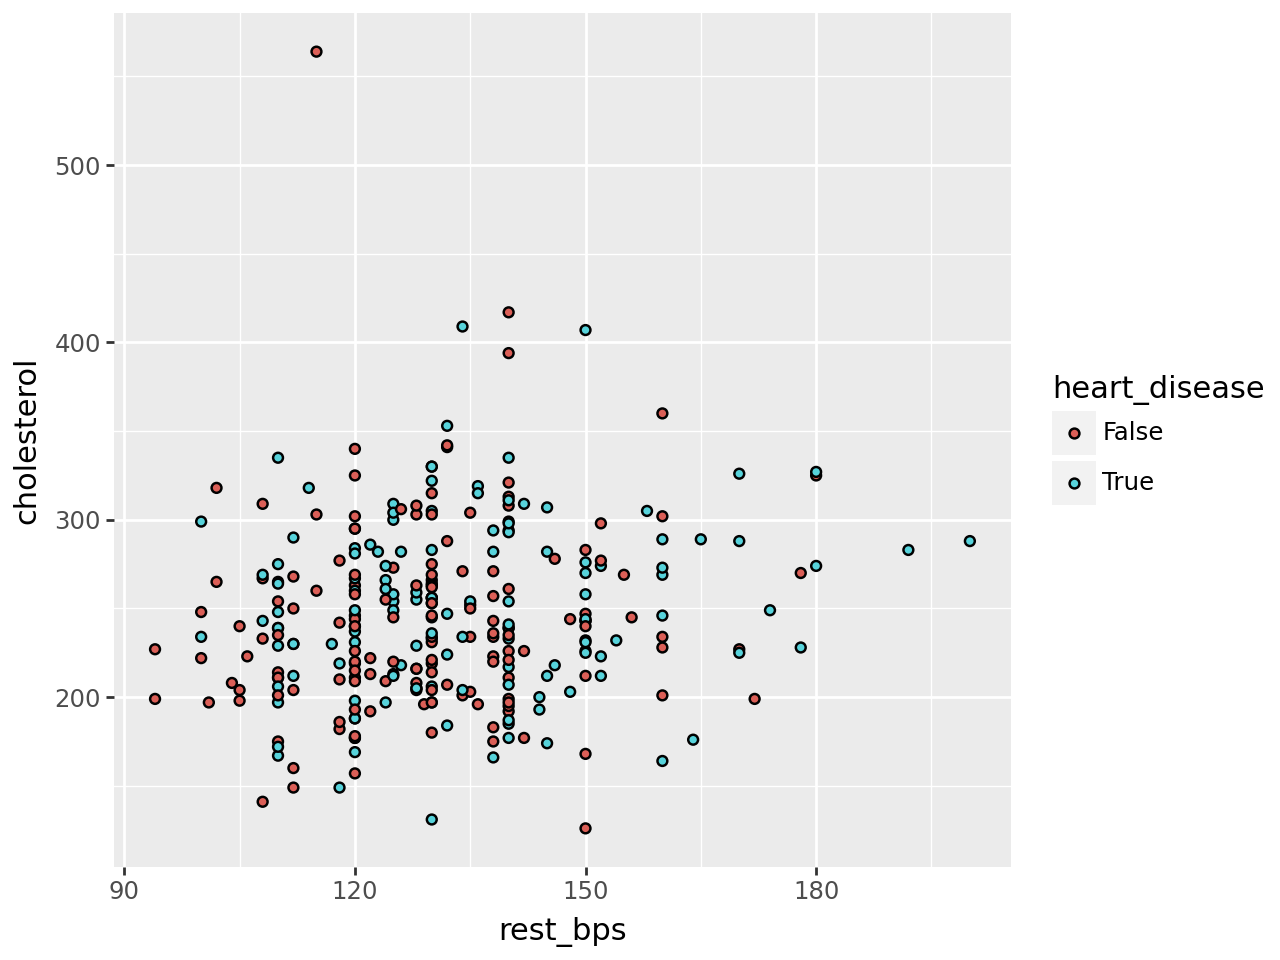

In [11]:
#Pairwise plot for heart_disease
(
ggplot(df, aes("rest_bps", "cholesterol", fill = "heart_disease"))
    +geom_point()
    
)

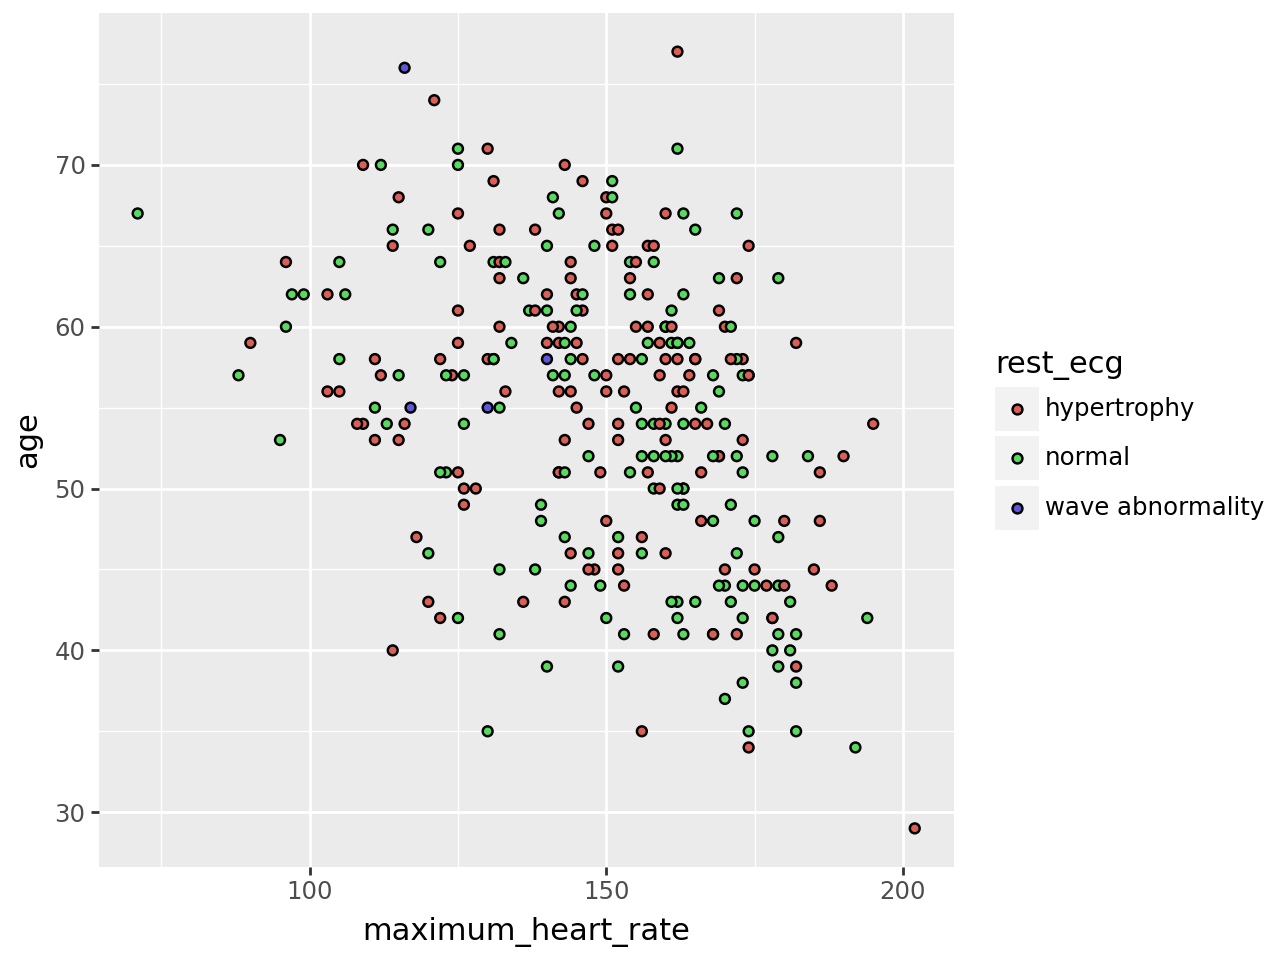

In [12]:
#Pairwise plot for rest_ecg
(
ggplot(df, aes("maximum_heart_rate", "age", fill = "rest_ecg"))
    +geom_point()
)

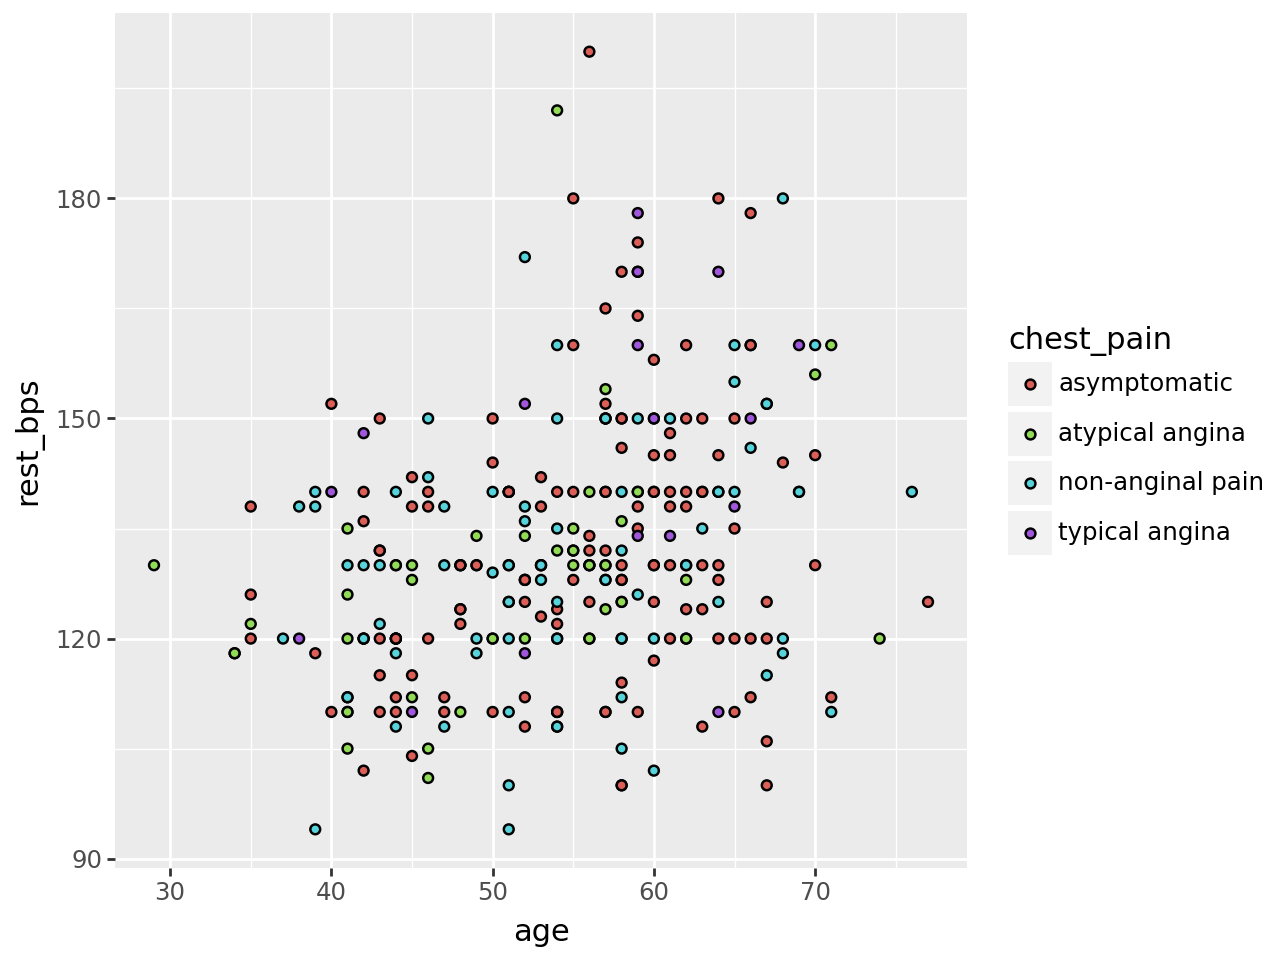

In [13]:
#Pairwise plot for chest_pain
(
ggplot(df, aes("age", "rest_bps", fill = "chest_pain"))
    +geom_point()
)

# Step #2

In [14]:
#drop the na values
df.dropna(inplace= True)

In [15]:
#check the dropped NA values
df

,age,female,chest_pain,rest_bps,cholesterol,high_fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_angina,vessels,heart_disease
0,57,False,asymptomatic,140,192,False,normal,148,False,0,False
1,56,True,atypical angina,140,294,False,hypertrophy,153,False,0,False
2,56,False,non-anginal pain,130,256,True,hypertrophy,142,True,1,True
3,44,False,atypical angina,120,263,False,normal,173,False,0,False
4,52,False,non-anginal pain,172,199,True,normal,162,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...
288,45,False,typical angina,110,264,False,normal,132,False,0,True
289,68,False,asymptomatic,144,193,True,normal,141,False,2,True
290,57,False,asymptomatic,130,131,False,normal,115,True,1,True
291,57,True,atypical angina,130,236,False,hypertrophy,174,False,1,True


In [16]:
#Reduce the data frame
ndf = df[["age", "rest_bps", "cholesterol", "maximum_heart_rate", "vessels"]]

In [17]:
#Show the reduced data frame
ndf

,age,rest_bps,cholesterol,maximum_heart_rate,vessels
0,57,140,192,148,0
1,56,140,294,153,0
2,56,130,256,142,1
3,44,120,263,173,0
4,52,172,199,162,0
...,...,...,...,...,...
288,45,110,264,132,0
289,68,144,193,141,2
290,57,130,131,115,1
291,57,130,236,174,1


In [46]:
#scale the data
ndf_clean = StandardScaler().fit_transform(ndf)

In [19]:
#display cleaned data
ndf_clean

array([[ 0.29323346,  0.4724435 , -1.04889344, -0.06246486, -0.71045244],
       [ 0.18194149,  0.4724435 ,  0.91337444,  0.15646103, -0.71045244],
       [ 0.18194149, -0.09186936,  0.18233346, -0.32517594,  0.36811007],
       ...,
       [ 0.29323346, -0.09186936, -2.22240658, -1.50737576,  0.36811007],
       [ 0.29323346, -0.09186936, -0.20242494,  1.07594979,  0.36811007],
       [-1.82131404,  0.35958093, -1.37593808,  1.03216461, -0.71045244]])

In [20]:
#run kMeans
clusters = KMeans(
    n_clusters = 2,
    n_init=1
)

clusters.fit(ndf_clean)

KMeans(n_clusters=2, n_init=1)

In [21]:
df['clusters'] = pd.Series(clusters.labels_).astype('str')

In [22]:
df.head(20)

,age,female,chest_pain,rest_bps,cholesterol,high_fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_angina,vessels,heart_disease,clusters
0,57,False,asymptomatic,140,192,False,normal,148,False,0,False,0
1,56,True,atypical angina,140,294,False,hypertrophy,153,False,0,False,0
2,56,False,non-anginal pain,130,256,True,hypertrophy,142,True,1,True,1
3,44,False,atypical angina,120,263,False,normal,173,False,0,False,0
4,52,False,non-anginal pain,172,199,True,normal,162,False,0,False,0
5,57,False,non-anginal pain,150,168,False,normal,174,False,0,False,0
6,48,False,atypical angina,110,229,False,normal,168,False,0,True,0
7,54,False,asymptomatic,140,239,False,normal,160,False,0,False,0
8,48,True,non-anginal pain,130,275,False,normal,139,False,0,False,0
9,49,False,atypical angina,130,266,False,normal,171,False,0,False,0


In [23]:
df['prediction'] = pd.Series(clusters.labels_).astype('bool')

In [24]:
df

,age,female,chest_pain,rest_bps,cholesterol,high_fasting_blood_sugar,rest_ecg,maximum_heart_rate,exercise_angina,vessels,heart_disease,clusters,prediction
0,57,False,asymptomatic,140,192,False,normal,148,False,0,False,0,False
1,56,True,atypical angina,140,294,False,hypertrophy,153,False,0,False,0,False
2,56,False,non-anginal pain,130,256,True,hypertrophy,142,True,1,True,1,True
3,44,False,atypical angina,120,263,False,normal,173,False,0,False,0,False
4,52,False,non-anginal pain,172,199,True,normal,162,False,0,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,45,False,typical angina,110,264,False,normal,132,False,0,True,0,False
289,68,False,asymptomatic,144,193,True,normal,141,False,2,True,1,True
290,57,False,asymptomatic,130,131,False,normal,115,True,1,True,1,True
291,57,True,atypical angina,130,236,False,hypertrophy,174,False,1,True,0,False


# Step #3

In [25]:
#identify the list
confusion = df[['heart_disease', 'prediction']]

In [26]:
confusion

,heart_disease,prediction
0,False,False
1,False,False
2,True,True
3,False,False
4,False,False
...,...,...
288,True,False
289,True,True
290,True,True
291,True,False


In [27]:
#make the confusion matrix
conf_matrix = confusion_matrix(df['heart_disease'], df['prediction'])
#saw you had to import confusion_matrix here: https://www.kaggle.com/code/enespolat/confusion-matrix

In [28]:
# displays a 2x2 c matrix
conf_matrix

array([[113,  46],
       [ 35,  99]])

In [29]:
#count the specific instances of prediction and heart disease
count = df[['prediction', 'heart_disease']].groupby(['prediction', 'heart_disease'], as_index = False).size()

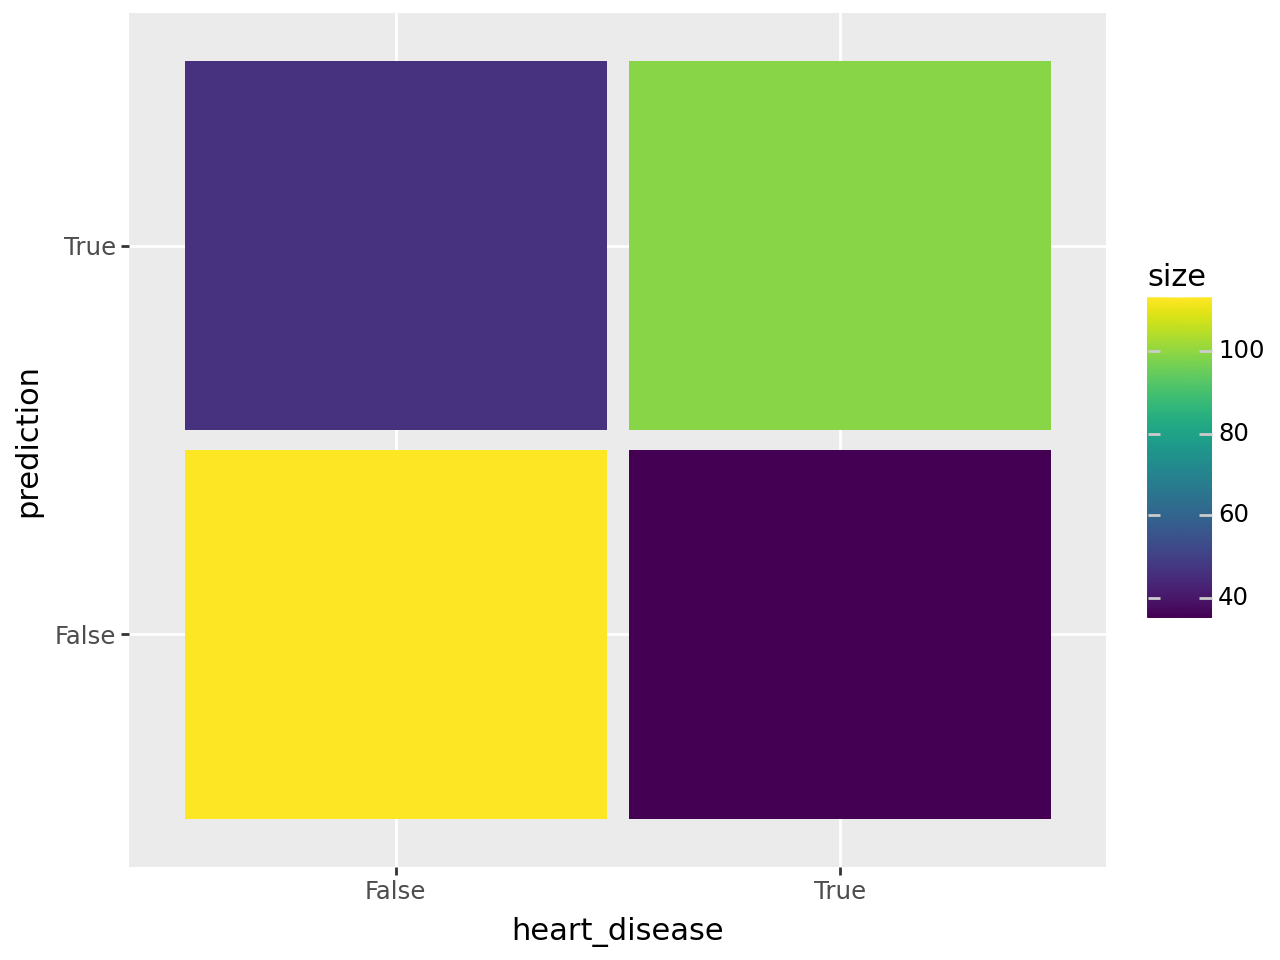

In [30]:
#heatmap of the false positives, false negatives, negatives, and positives
(
    ggplot(count, aes("heart_disease", "prediction", fill = "size"))
    + geom_tile(aes(width=0.95, height=0.95))
)

# Step #4

In [31]:
pca = PCA(n_components=2).fit(ndf)

In [32]:
pca

PCA(n_components=2)

In [33]:
var = pca.explained_variance_

In [34]:
var

array([2721.29405747,  538.7913243 ])

In [35]:
X_pca = pca.transform(ndf)

In [36]:
#pca as dataframe
X_pca

array([[-5.38763663e+01,  3.33479680e+00],
       [ 4.78663868e+01, -3.09883982e+00],
       [ 9.45148317e+00,  7.29635535e+00],
       [ 1.54027577e+01, -2.61987829e+01],
       [-4.54510428e+01, -8.46308710e+00],
       [-7.73625486e+01, -2.09289935e+01],
       [-1.88843930e+01, -2.10497056e+01],
       [-7.11017934e+00, -9.57864442e+00],
       [ 2.81155189e+01,  8.57487862e+00],
       [ 1.91063070e+01, -2.24996056e+01],
       [-3.61967491e+01,  5.51440682e+00],
       [ 3.74634152e+01, -1.05210682e+01],
       [ 3.69126625e+01, -1.12865087e+01],
       [-2.23651186e+01, -2.21254513e+01],
       [-4.02728002e+01,  1.84746254e+01],
       [-2.82506468e+01, -9.85983228e+00],
       [ 9.27731904e+01, -2.37951389e+01],
       [-1.90207433e+01,  3.86899916e+01],
       [ 9.54865416e-01, -2.14874519e+01],
       [-8.09477520e+01,  3.13118523e+01],
       [-6.52327458e+00,  1.88803925e+00],
       [-1.70520873e+01, -1.04682276e+01],
       [ 8.90728536e+01, -7.14699289e+00],
       [-1.

In [37]:
pcadf = pd.DataFrame({
    'component': ['PCA-1', 'PCA-2'],
    'variance': var
})

In [38]:
pcadf

,component,variance
0,PCA-1,2721.294057
1,PCA-2,538.791324


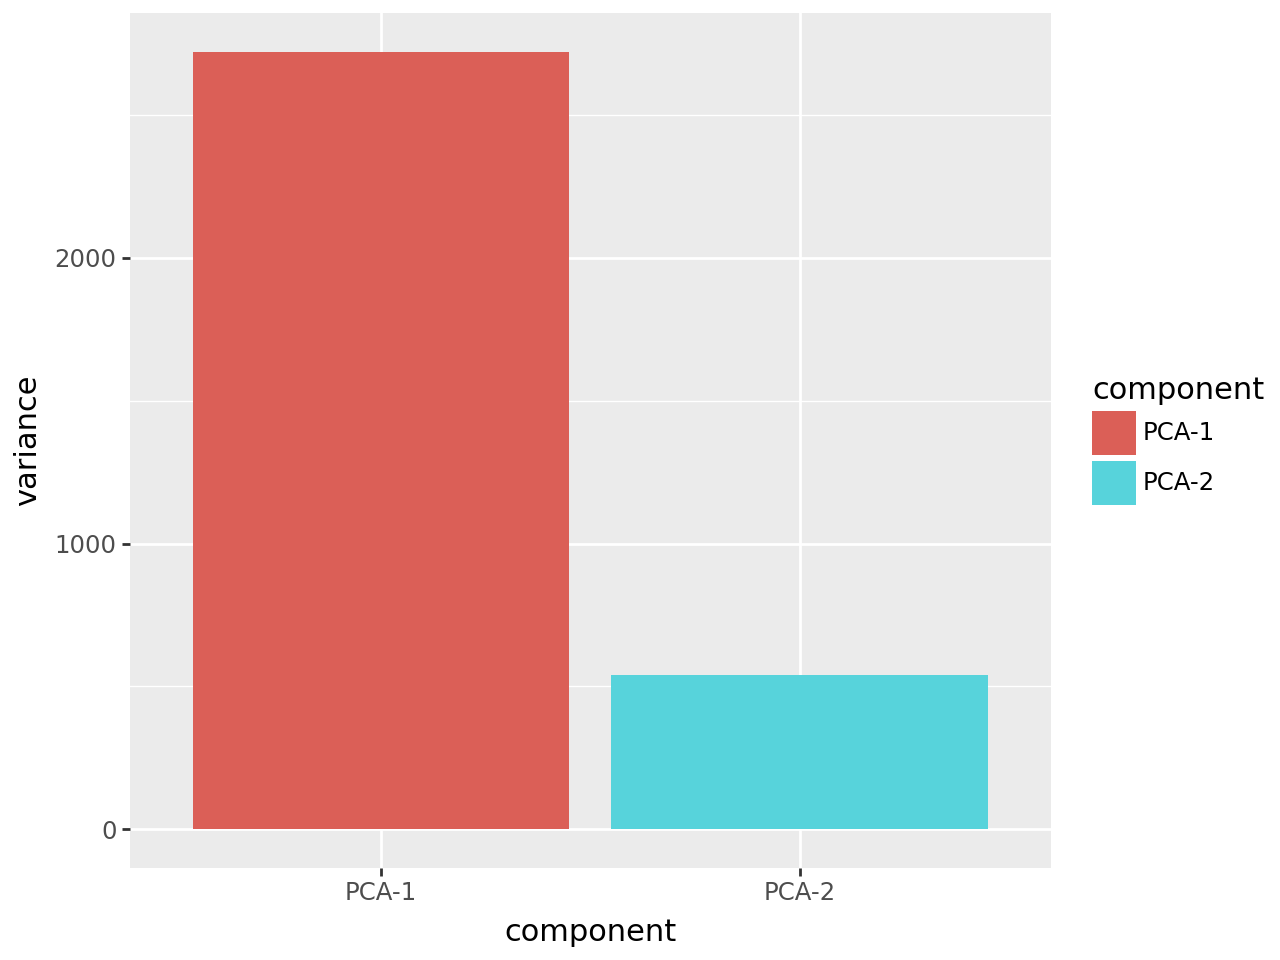

In [39]:
(
    ggplot(pcadf, aes("component", "variance", fill="component"))
    + geom_bar(stat="identity")
)

In [40]:
ndf = PCA(n_components=2).fit_transform(ndf)

In [41]:
result = KMeans(2, n_init=10).fit(ndf)

result.cluster_centers_


array([[-30.64539814,  -1.93329425],
       [ 52.494432  ,   3.31166144]])

In [42]:
df['cluster'] = result.labels_

In [43]:
pcadf = pd.DataFrame(ndf, columns=['PCA-1', 'PCA-2'])
pcadf['cluster'] = result.labels_

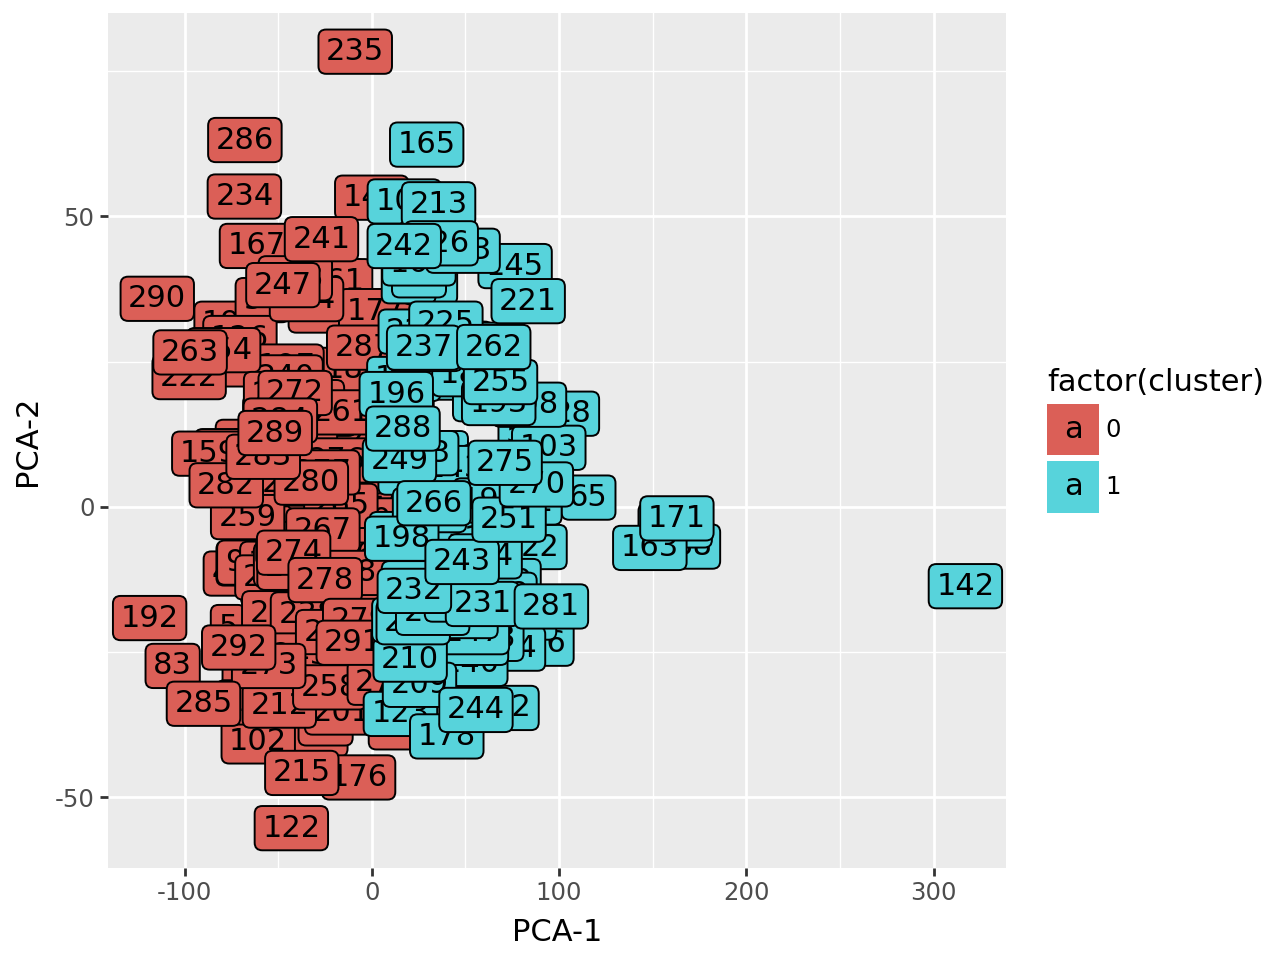

In [44]:
#all of this is pulled from lemur notebook
(
    ggplot(pcadf, aes("PCA-1", "PCA-2", fill="factor(cluster)"))
    + geom_point(size=5)
    + geom_label(aes(label=df.index), nudge_x=.6, nudge_y=.2)
)

Describe how much variance is explained through using these components:

Variance is displayed through the model with most of the data points being consistent in PCA 1 and PCA 2 with a few outliers in on PCA 1. The components are compartmentalized into groups based off of their simularity to eath other. The variance is clustered around primarily clustered around 0 which is a good thing because that means that there are the results are pretty accurate. There is a good number of points that aren't located around 0 which means that there is less of a correlation for these points.


# Step #5

* How would you decribe the results of this experiment? The results show that there are strong indicators of predicting heart disease. The predictions are not perfect, but the PCA variance clusters are primarily centered around 0,0, which means that there is strong consistency and accuracy. For the data points that were not close to 0,0, it these would be harder to predict a heart attack because the variances were high so the prediction might potentially be inacurate.


* What would you recommend to the doctors that tasked you with this problem? I would reccomend that doctors list patients with known problems of chest_pain, rest_ecg, and heart_disease as high risk personel for heart attacks. The data shows that these groups of people are at the highest risk and if we could prevent heart attacks from happening, then that would be optimal


* What could be done to improve the outcome of your model? We could definitely improve the accuracy .The predictions are decently accurate, but I would like to narrow the results down so the PCA centroids are closer to 0,0 and the clusters are less dispersed. I think we could take in other factors, such as geneolical history and other medical factors that could help us better predict the results.


* Assuming you cannot build a perfect model, how should you optimize your model with respect to the confusion matrix analysis? The confusion matrix allows us to be able to optimize results based off of input from past medical history. It provides an accuracy rating for heart disease and could definitely be advanced to take in more parameters to have more success



